In [1]:
import pandas as pd
import os
print(os.getcwd())

d:\github\coding-academy\courses\data_analysis\d046


In [2]:
chipo = pd.read_csv("../../../../data/chipotle.tsv", sep="\t")
print(type(chipo.info()))  # NoneType

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
<class 'NoneType'>


In [3]:
with pd.option_context('display.max_rows',8):
    display(chipo)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
...,...,...,...,...,...
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [4]:
print(type(chipo.describe()))
display(chipo.describe())

<class 'pandas.core.frame.DataFrame'>


,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [5]:
print(type(chipo.count()))
display(chipo.count().to_frame())

<class 'pandas.core.series.Series'>


,0
order_id,4622
quantity,4622
item_name,4622
choice_description,3376
item_price,4622


In [6]:
with pd.option_context('display.max_rows',8):
    display(chipo["item_name"].to_frame())

,item_name
0,Chips and Fresh Tomato Salsa
1,Izze
2,Nantucket Nectar
3,Chips and Tomatillo-Green Chili Salsa
...,...
4618,Steak Burrito
4619,Chicken Salad Bowl
4620,Chicken Salad Bowl
4621,Chicken Salad Bowl


In [7]:
%timeit chipo["item_name"].to_frame()

126 µs ± 210 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
%timeit chipo["item_name"]

1.12 µs ± 8.83 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [9]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [10]:
chipogroup = chipo.groupby("item_name")
print(type(chipogroup))
cnt = 0
for key, group in chipogroup:
    if cnt < 4:
        print("* key", key)
        print("* len", len(group))
        display(group.head(4))
        cnt += 1

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
* key 6 Pack Soft Drink
* len 54


,order_id,quantity,item_name,choice_description,item_price
298,129,1,6 Pack Soft Drink,[Sprite],$6.49
341,148,1,6 Pack Soft Drink,[Diet Coke],$6.49
357,154,1,6 Pack Soft Drink,[Coke],$6.49
388,168,1,6 Pack Soft Drink,[Diet Coke],$6.49


* key Barbacoa Bowl
* len 66


,order_id,quantity,item_name,choice_description,item_price
39,19,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$11.75
58,27,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$11.75
95,42,1,Barbacoa Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
115,51,1,Barbacoa Bowl,"[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-G...",$8.99


* key Barbacoa Burrito
* len 91


,order_id,quantity,item_name,choice_description,item_price
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",$8.99
81,36,1,Barbacoa Burrito,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Chees...",$9.25
121,53,1,Barbacoa Burrito,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",$9.25
130,57,1,Barbacoa Burrito,"[Roasted Chili Corn Salsa, [Rice, Pinto Beans,...",$11.75


* key Barbacoa Crispy Tacos
* len 11


,order_id,quantity,item_name,choice_description,item_price
168,75,1,Barbacoa Crispy Tacos,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",$11.75
255,110,1,Barbacoa Crispy Tacos,"[Roasted Chili Corn Salsa, [Rice, Cheese, Lett...",$9.25
429,186,1,Barbacoa Crispy Tacos,"[[Roasted Chili Corn Salsa (Medium), Tomatillo...",$11.48
485,205,1,Barbacoa Crispy Tacos,"[Fresh Tomato Salsa, Guacamole]",$11.75


In [11]:
print(type(chipogroup.count()))
with pd.option_context('display.max_rows',8):
    display(chipogroup.count())

<class 'pandas.core.frame.DataFrame'>


,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,54,54,54,54
Barbacoa Bowl,66,66,66,66
Barbacoa Burrito,91,91,91,91
Barbacoa Crispy Tacos,11,11,11,11
...,...,...,...,...
Veggie Crispy Tacos,1,1,1,1
Veggie Salad,6,6,6,6
Veggie Salad Bowl,18,18,18,18
Veggie Soft Tacos,7,7,7,7


In [12]:
srgroup = chipo.groupby("item_name")["order_id"]
print(type(srgroup))
cnt = 0
for key, series in srgroup:
    if cnt < 4:
        print("* key", key)
        print("* len", len(series))
        display(series.to_frame().head(4))
        cnt += 1

<class 'pandas.core.groupby.generic.SeriesGroupBy'>
* key 6 Pack Soft Drink
* len 54


,order_id
298,129
341,148
357,154
388,168


* key Barbacoa Bowl
* len 66


,order_id
39,19
58,27
95,42
115,51


* key Barbacoa Burrito
* len 91


,order_id
21,11
81,36
121,53
130,57


* key Barbacoa Crispy Tacos
* len 11


,order_id
168,75
255,110
429,186
485,205


In [13]:
print(type(srgroup.count()))
with pd.option_context('display.max_rows',8):
    display(srgroup.count().to_frame())

<class 'pandas.core.series.Series'>


,order_id
item_name,
6 Pack Soft Drink,54
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,11
...,...
Veggie Crispy Tacos,1
Veggie Salad,6
Veggie Salad Bowl,18
Veggie Soft Tacos,7


<AxesSubplot:xlabel='item_name'>

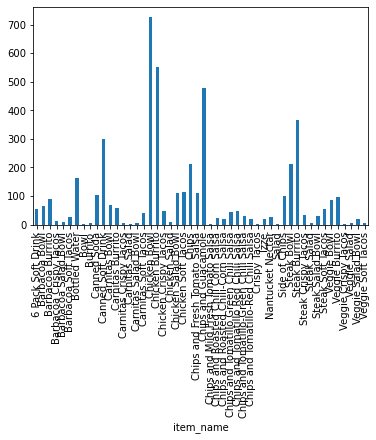

In [14]:
order_count = srgroup.count()
display(order_count.plot(kind="bar"))

<AxesSubplot:xlabel='item_name'>

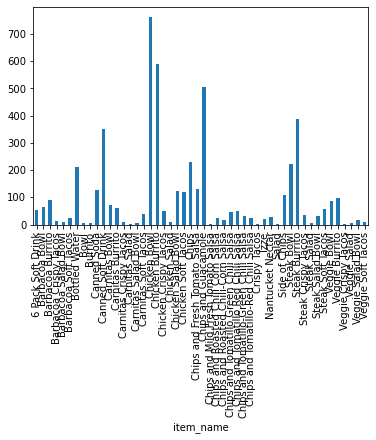

In [15]:
item_quantity = chipo.groupby("item_name")["quantity"].sum()
display(item_quantity.plot(kind="bar"))

<AxesSubplot:xlabel='item_name'>

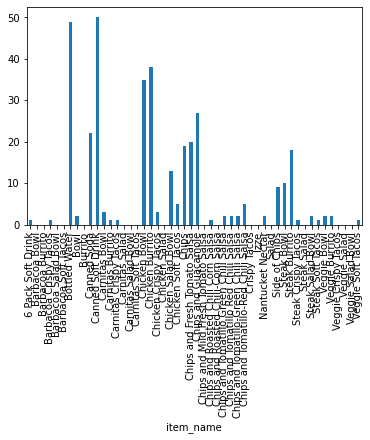

In [16]:
display(item_quantity.subtract(order_count).plot.bar())

<AxesSubplot:>

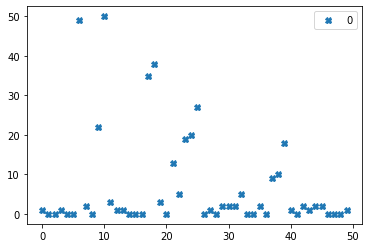

In [17]:
chipo2 = item_quantity.subtract(order_count).reset_index()
chipo2.plot(style="X")

<AxesSubplot:xlabel='index', ylabel='item_quantity'>

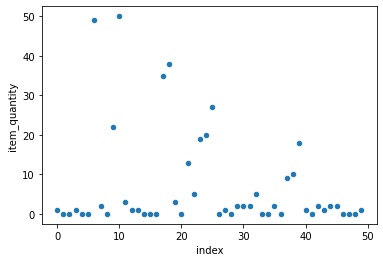

In [18]:
chipo3 = chipo2.copy().reset_index()
chipo3.columns = ["index", "dummy", "item_quantity"]
chipo3.pop("dummy")
chipo3.plot.scatter(x="index", y="item_quantity", use_index=True)

In [19]:
chipo4 = chipo.copy()
with pd.option_context('display.max_rows',8):
    display(chipo4["item_price"].apply(lambda x: float(x[1:])))

0        2.39
1        3.39
2        3.39
3        2.39
        ...  
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64